Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
data = pd.read_csv('/content/bank-full.csv.csv',sep=';')

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8126,42,blue-collar,married,secondary,no,-21,no,no,unknown,2,jun,377,1,-1.0,0.0,unknown,no
8127,32,technician,divorced,secondary,no,-399,yes,no,unknown,2,jun,180,1,-1.0,0.0,unknown,no
8128,61,retired,married,primary,no,-156,yes,yes,unknown,2,jun,283,5,-1.0,0.0,unknown,no
8129,42,blue-collar,married,secondary,no,-755,yes,yes,unknown,2,jun,312,1,-1.0,0.0,unknown,no


**EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8131 entries, 0 to 8130
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8131 non-null   int64  
 1   job        8131 non-null   object 
 2   marital    8131 non-null   object 
 3   education  8131 non-null   object 
 4   default    8131 non-null   object 
 5   balance    8131 non-null   int64  
 6   housing    8131 non-null   object 
 7   loan       8131 non-null   object 
 8   contact    8131 non-null   object 
 9   day        8131 non-null   int64  
 10  month      8131 non-null   object 
 11  duration   8131 non-null   int64  
 12  campaign   8131 non-null   int64  
 13  pdays      8130 non-null   float64
 14  previous   8130 non-null   float64
 15  poutcome   8130 non-null   object 
 16  y          8130 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8131.000000,8131.000000,8131.000000,8131.000000,8131.000000,8130.0,8130.0
mean,39.415939,1014.384701,17.382241,264.579511,2.533022,-1.0,0.0
std,9.234217,2462.222580,8.398354,249.074739,2.846760,0.0,0.0
min,20.000000,-3372.000000,2.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,41.000000,9.000000,118.000000,1.000000,-1.0,0.0
50%,38.000000,326.000000,16.000000,193.000000,2.000000,-1.0,0.0
75%,46.000000,1033.000000,26.000000,322.000000,3.000000,-1.0,0.0
max,61.000000,58544.000000,30.000000,3366.000000,63.000000,-1.0,0.0


In [ ]:
data.shape

(8131, 17)

In [ ]:
data = data.dropna()
data.shape

(8130, 17)

In [ ]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [ ]:
data1 = data[data["y"]=="yes"]
data2 = data[data["y"]=="no"]

<Axes: xlabel='y', ylabel='count'>

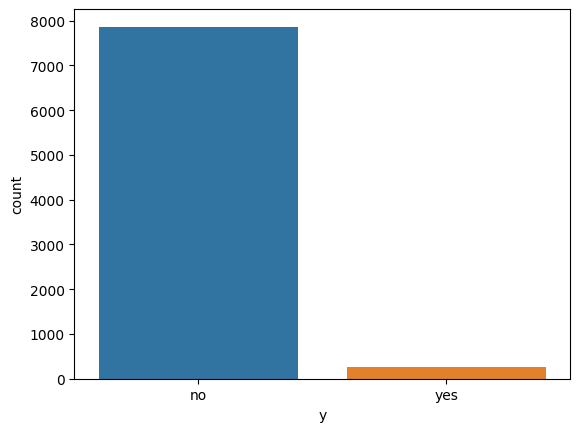

In [ ]:
sns.countplot(x="y",data=data)

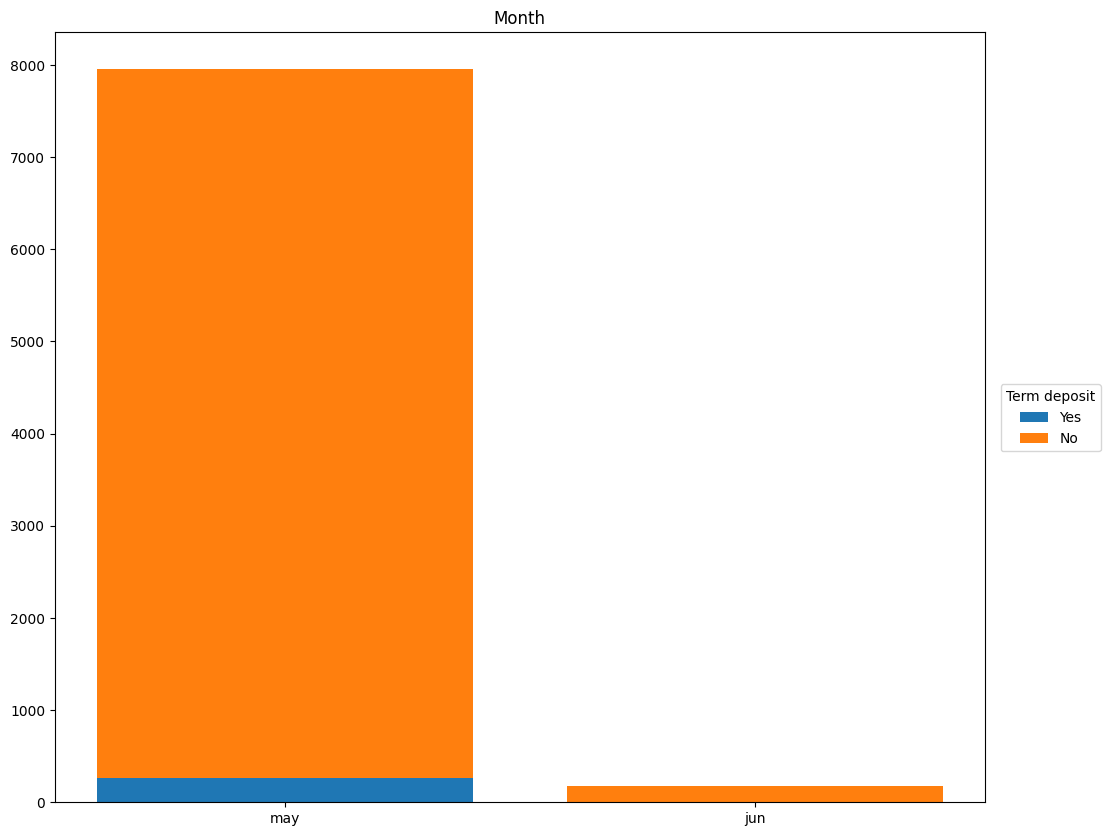

In [ ]:
fig,ax = plt.subplots(figsize=(12,10))
ax.bar(data1["month"].unique(),height=data1["month"].value_counts())
ax.bar(data2["month"].unique(),height=data2["month"].value_counts(),bottom=data1["month"].value_counts())
ax.title.set_text("Month")
plt.figlegend(('Yes','No'),loc='right',title="Term deposit")
plt.show()

In [ ]:
data["y"].value_counts()

no     7866
yes     264
Name: y, dtype: int64

In [ ]:
#Dividing data into input and output variable
x = data.iloc[:,0:16]
y = data.iloc[:,16]

In [ ]:
x = pd.get_dummies(x)
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_unknown,month_jun,month_may,poutcome_unknown
0,58,2143,5,261,1,-1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,1
1,44,29,5,151,1,-1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,1
2,33,2,5,76,1,-1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,1
3,47,1506,5,92,1,-1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,1
4,33,1,5,198,1,-1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8125,29,2768,2,121,4,-1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,1,0,1
8126,42,-21,2,377,1,-1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1
8127,32,-399,2,180,1,-1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,1
8128,61,-156,2,283,5,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1,0,1


In [ ]:
# logistics regression model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
classifier = LogisticRegression(random_state=0,multi_class="auto",max_iter=3000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [ ]:
y_predict = classifier.predict(x_test)

In [ ]:
#confusion matrix for model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[1565   13]
 [  40    8]]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
print("Accuracy Score:",accuracy_score(y_test,y_predict))
print("Model Score:",classifier.score(x_test,y_test))

Accuracy Score: 0.9674046740467405
Model Score: 0.9674046740467405


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          no       0.98      0.99      0.98      1578
         yes       0.38      0.17      0.23        48

    accuracy                           0.97      1626
   macro avg       0.68      0.58      0.61      1626
weighted avg       0.96      0.97      0.96      1626



In [ ]:
from sklearn.preprocessing import label_binarize
y_test = label_binarize(y_test,classes=['no','yes'])
y_predict = label_binarize(y_predict,classes=['no','yes'])

Text(0, 0.5, 'True Positive Rate')

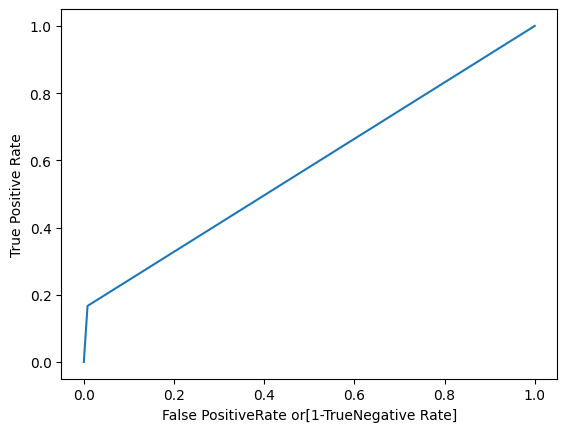

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,_=roc_curve(y_test,y_predict)
plt.plot(fpr,tpr)
plt.xlabel('False PositiveRate or[1-TrueNegative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
auc = roc_auc_score(y_test,y_predict)
auc

0.579214195183777